<a href="https://colab.research.google.com/github/kebreck/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_1_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Normal Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [0]:
column_headers = ['age', 'year', 'nodes', 'survival']

# Informative names indicate what the data is telling you about each patient

In [0]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

boobs = pd.read_csv(url, header=None, names = column_headers)

In [115]:
boobs.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [116]:
boobs.shape

# Confirmed correct shape from UCI

(306, 4)

In [117]:
boobs.isnull().sum()

# No missing data

age         0
year        0
nodes       0
survival    0
dtype: int64

In [118]:
boobs['survival'].value_counts()

1    225
2     81
Name: survival, dtype: int64

In [0]:
# The survival variable is encoded as 1 for surviving >5 years and 2 for not - 
# change this to be 0 for not surviving and 1 for surviving >5 years 
# (0/1 is a more traditional encoding of binary variables)

def binary_survival(num):
  if num == 2:
    return 0
  else:
    return 1

In [0]:
boobs['survival'] = boobs['survival'].apply(binary_survival)

In [121]:
boobs['survival'].value_counts()

1    225
0     81
Name: survival, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [123]:
# TODO

survival_age = pd.crosstab(boobs['age'], boobs['survival'])
survival_age.sample(10)

survival,0,1
age,,
63,1,7
58,0,7
39,1,5
46,4,3
47,3,8
45,3,6
76,0,1
53,6,5
64,0,5


In [90]:
boobs['nodes'].describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: nodes, dtype: float64

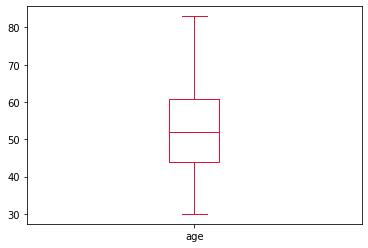

In [91]:
boobs['age'].plot(kind='box',color='crimson');

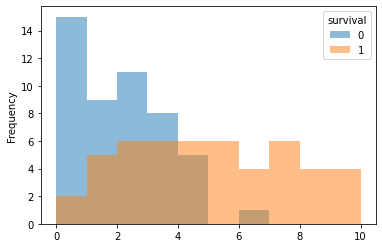

In [124]:
survival_age.plot(kind='hist', alpha=0.5);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

* *Age has a negative relationship with survival - deaths were far more common among the elderly* 

In [93]:
boobs['year'].describe()

count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: year, dtype: float64

In [125]:
boobs.corr()

,age,year,nodes,survival
age,1.000000,0.089529,-0.063176,-0.067950
year,0.089529,1.000000,-0.003764,0.004768
nodes,-0.063176,-0.003764,1.000000,-0.286768
survival,-0.067950,0.004768,-0.286768,1.000000



* Year had a positive relationship with survival, likely meaning that the surgeries became slightly better over time

* The positive correlation between the attributes of age and year must mean that younger patients tended to have their surgeries performed sooner